## Import des Packages


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Import des Données

In [4]:
train = pd.read_csv("C:/Users/coren/OneDrive/Bureau/gaspard/train.csv")

## Preparation des Données

On se fait tout d'abord une idée des valeurs prisent par notre target

In [61]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
      

In [3]:
train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

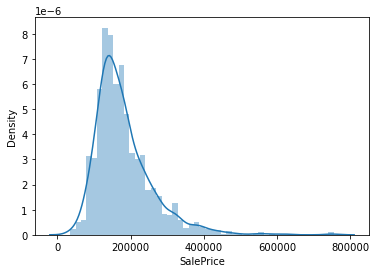

In [6]:
sns.distplot(train['SalePrice'])

On voit que la valeur minumun n'est pas 0 et que les prix sont repartis selon une courbe ayant l'allure d'une loi Normale ce qui est plutôt rassurant pour la suite.

### Gestion des Données manquantes

On affiche les variables presentant des données manquantes 

In [177]:
train.isna().sum()[train.isna().sum()!=0]


LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [176]:
sum(train["Street"]=="Grvl")

6

La variable LotFrontage présente trop de données manquante pour être exploité il faut donc la supprimer de notre Dataset.
Pour les autres varibles plusieurs options s'offrent a nous, on peut remplacer les données manquantes par leur moyenne ( fillna), ou tout simplement les supprimer ( dropna). On optera pour la deuxième option. 
On enleve aussi la variable Street qui n'a aucun interet car seulement 6/1460 rues sont en gravier
Les nombreuses NA pour les variables Alley, Fence etc signifie juste que les maisons ne comportent pas une de ses caracteristiques. 

In [9]:
train=train.drop(["LotFrontage","Street","Id"],axis=1) 
train=train.loc[:,~train.columns.isin(["Alley","Fence","PoolQC","MiscFeature","FireplaceQu"])].dropna()


### Encodage

Notre base de données contient de nombreuses variables catégorielles comportant plus de 2 catégories, leurs associer des numéros tel que 0,1,2,3.. etablierai une relation d'ordre entre les différentes catégories qui n'aurait aucun sens. On pourrait aussi  créer une colonnne par catégorie, remplie de 0 ou 1 si notre observation appartient ou non à cette catégorie mais vu le nombre de categorie dans chaque variable, notre nouveau DataFrame aurait beaucoup trop de colonnes ce qui le rendrait difficelement manipulable.Nous optons pour un Mean Encododing qui semble plus approprié dans notre cas. 

In [5]:
cat_features=["Electrical","MSSubClass","HouseStyle","Exterior1st","Exterior2nd","RoofMatl","MasVnrType","MSZoning","LandContour","Utilities","LotConfig","LandSlope","Neighborhood","Condition1","Condition2","BldgType","RoofStyle","Foundation","Heating","GarageType","SaleType","SaleCondition","GarageCond","GarageQual","GarageFinish","KitchenQual","HeatingQC","BsmtFinType2","BsmtFinType1","BsmtExposure","BsmtCond","BsmtQual","ExterCond","ExterQual","LotShape","CentralAir"]


In [6]:
def categorical_features_encoder(df,features):
     for col in features :
        mean_encode=train.groupby(col)["SalePrice"].mean()
        df.loc[:,str(col)+'_mean_enc']=train[col].map(mean_encode)
        df=df.drop(col,axis=1)
     return df

In [7]:
train=categorical_features_encoder(train,cat_features)

In [10]:
train.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,HeatingQC_mean_enc,BsmtFinType2_mean_enc,BsmtFinType1_mean_enc,BsmtExposure_mean_enc,BsmtCond_mean_enc,BsmtQual_mean_enc,ExterCond_mean_enc,ExterQual_mean_enc,LotShape_mean_enc,CentralAir_mean_enc
0,8450,7,5,2003,2003,196.0,706,0,150,856,...,214914.429150,184694.690287,235413.720096,165652.295908,183632.620900,202688.478964,184034.896256,231633.510246,164754.818378,186186.70989
1,9600,6,8,1976,1976,0.0,978,0,284,1262,...,214914.429150,184694.690287,161573.068182,257689.805970,183632.620900,202688.478964,184034.896256,144341.313466,164754.818378,186186.70989
2,11250,7,5,2001,2002,162.0,486,0,434,920,...,214914.429150,184694.690287,235413.720096,192789.657895,183632.620900,202688.478964,184034.896256,231633.510246,206101.665289,186186.70989
3,9550,7,5,1915,1970,0.0,216,0,540,756,...,156858.871369,184694.690287,161573.068182,165652.295908,213599.907692,140759.818182,184034.896256,144341.313466,206101.665289,186186.70989
4,14260,8,5,2000,2000,350.0,655,0,490,1145,...,214914.429150,184694.690287,235413.720096,206643.420814,183632.620900,202688.478964,184034.896256,231633.510246,206101.665289,186186.70989


## Visualisation des Données et Selection 

Nos données étant encodées, elles sont maintenant exploitable par la machine, cherchons les variables les plus corrélées entre elles ainsi qu'avec notre target. Commencons par selectionner des variables qui a premières vu nous semble importante. Pour nous aider dans notre choix, regardons quelles sont les 10 variables les plus corrélées avec notre target grâce à un test de Kendall. 

In [13]:
from scipy import stats

def kendall_correlation(df, y):
    imp=np.array([])
    pvalue=np.array([])

    for i in range(0, len(list(df))):
        imp = np.append(imp,stats.kendalltau(df.iloc[:,i],y)[0])
        pvalue = np.append(pvalue,stats.kendalltau(df.iloc[:,i],y)[1])
    return pd.DataFrame({'cols':df.columns, 'imp':imp, 'pvalue':pvalue}
                       ).sort_values('imp', ascending=False)

pd.options.display.max_rows = None
kendall_correlation(train.loc[:,~train.columns.isin(["SalePrice"])],train["SalePrice"])


,cols,imp,pvalue
5,OverallQual,0.669660,8.532414e-268
56,Neighborhood_mean_enc,0.582365,2.773277e-228
29,GarageCars,0.572168,4.777985e-176
77,ExterQual_mean_enc,0.563403,1.140212e-158
69,KitchenQual_mean_enc,0.552992,2.344451e-158
17,GrLivArea,0.543942,4.580102e-212
20,FullBath,0.518693,4.281180e-133
30,GarageArea,0.478146,5.757072e-163
7,YearBuilt,0.470960,3.269172e-157
61,Foundation_mean_enc,0.459514,1.750950e-111


In [11]:
Var_imp=["OverallQual","Neighborhood_mean_enc","ExterQual_mean_enc","GarageCars","BsmtQual_mean_enc","GrLivArea","KitchenQual_mean_enc","FullBath","GarageFinish_mean_enc","YearBuilt","SalePrice"]

Pour affiner notre choix et repérer les eventuelles corrélations entre nos variables utilisons une matrice de Corrélation. 

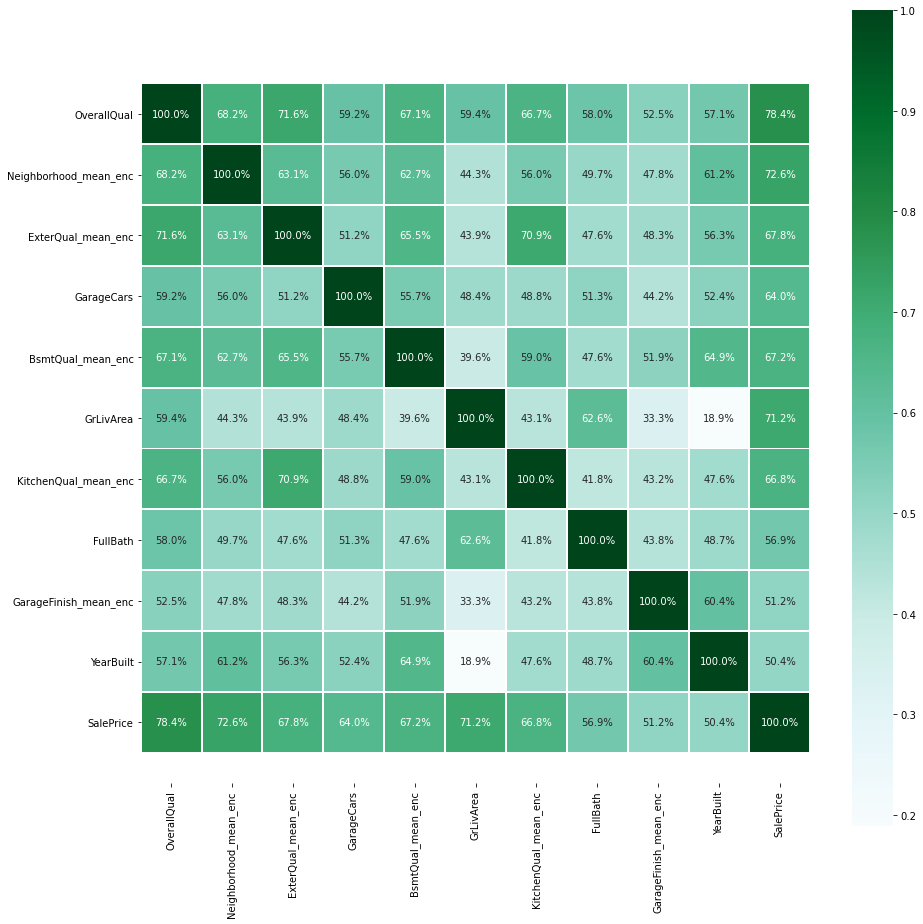

In [95]:
corrMatrix = train[Var_imp].corr()
plt.figure(figsize=(15, 15))   #Pour régler la taille de notre matrice de corrélation
ax = sns.heatmap(corrMatrix, annot=True,cmap='BuGn',fmt = '.1%', square=1, linewidth=1.0)   #On ajoute des params pour mettre en pourcentage (plus lisible)
bottom, top = ax.get_ylim()          #Pour régler le problème de matplotlib 3.1.1 qui coupe la matrice de corrélation
ax.set_ylim(bottom +0.5, top-0.5)
plt.show() 

La matrice de corrélation confirme que le voisinage et les materiaux qui ont servis à construire la maison sont les variables qui influe le plus sur le prix de vente

In [105]:
def visualisationcat_SalePrice(var):
  plt.figure(figsize=(20, 12))
  plt.subplot(2, 4, 1)
  sns.boxplot(data=train,x ="GarageCars", y=var, showfliers = False)
  plt.subplot(2, 4, 2)
  sns.boxplot(data=train,x="OverallQual", y=var, showfliers = False)
  plt.subplot(2, 4, 3)
  sns.boxplot(data=train,x ="FullBath", y=var, showfliers = False)
  plt.subplot(2, 4, 4)
  sns.boxplot(data=train,x = "ExterQual_mean_enc", y=var , showfliers = False)
  plt.subplot(2, 4, 5)
  sns.boxplot(data=train,x = "BsmtQual_mean_enc", y=var, showfliers = False)
  plt.subplot(2, 4, 6)
  sns.boxplot(data=train,x = "GarageFinish_mean_enc", y=var, showfliers = False)
  plt.subplot(2, 4, 7)
  sns.boxplot(data=train,x = "KitchenQual_mean_enc", y=var, showfliers = False)
  plt.subplot(2, 4, 8)
  sns.boxplot(data=train,x = "Neighborhood_mean_enc", y=var, showfliers = False)
  




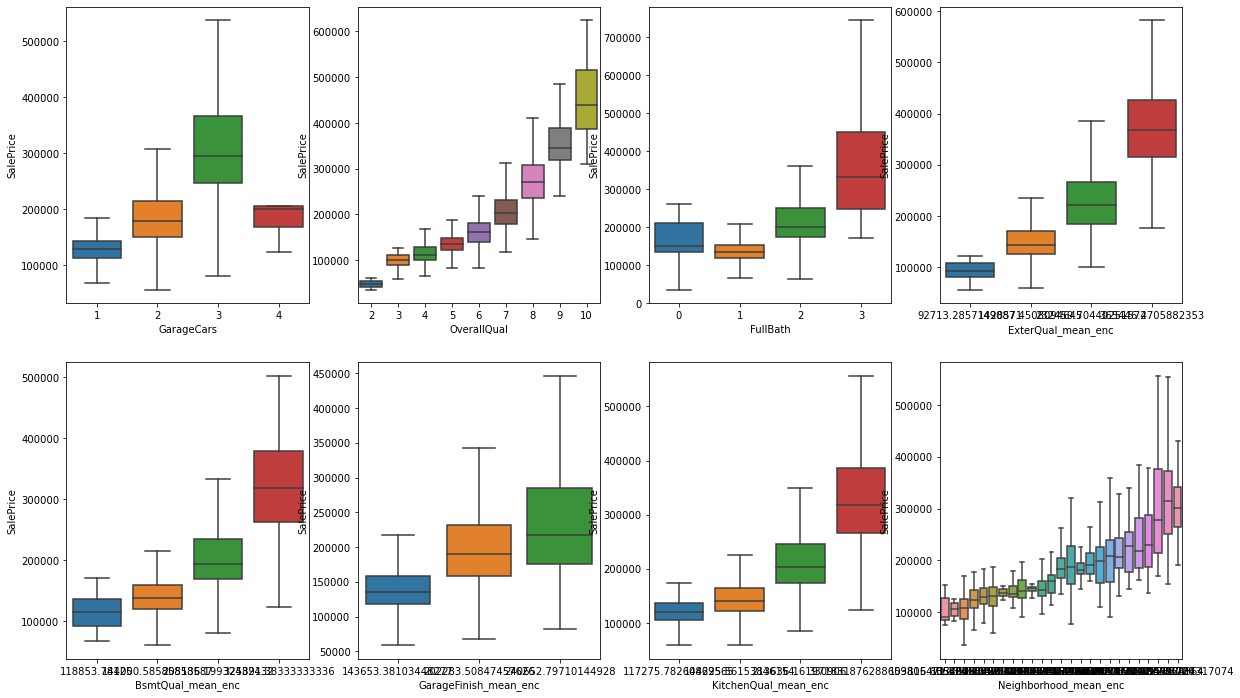

In [107]:
visualisationcat_SalePrice("SalePrice")

In [63]:
train[train["GarageCars"]==4]["SalePrice"]

420     206300
747     265979
1190    168000
1340    123000
1350    200000
Name: SalePrice, dtype: int64

Nos variables sont donc toutes corrélées positivement avec le prix de vente, plus la qualité des materiaux , le nombre de salle de bain ou encore la qualité de la cuisine augmentent, plus le prix augmente. Le nombre de place de voiture dans le garage pourrait etre une exeption mais seulement 5 biens bénéficient de 4 places dans leurs garage ce qui est trop peu pour tirer des conclusions. 

In [36]:
Var_imp_con=["GrLivArea","YearBuilt"]

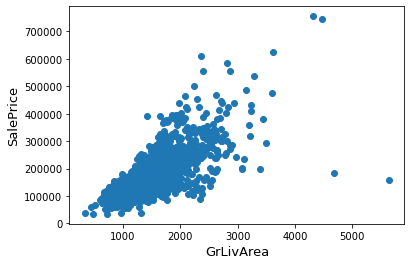

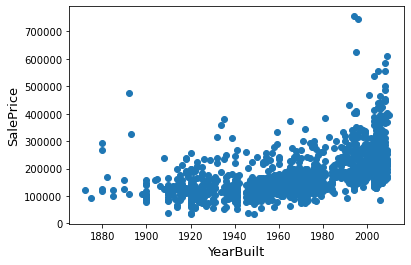

In [37]:
for i in range (0,len(Var_imp_con)):
    fig, ax = plt.subplots()
    ax.scatter(x = train[Var_imp_con[i]], y = train['SalePrice'])
    plt.ylabel('SalePrice', fontsize=13)
    plt.xlabel(str(Var_imp_con[i]), fontsize=13)
    plt.show()

Même conclusion pour les frais de surfaces habitables (on peut d'ailleurs repérer deux valeurs abérantes qu'on supprimera par la suite. 
Par contre l'année de construction semble avoir un plus faible impact sur le prix finale de vente même si dans l'ensemble les biens neufs sont légèrmement plus chère.

### Suppression des Outliers

In [12]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

## Modèles et Prédictions

Nos données sont encodées, nous avons visualisé l'impact de nos features sur notre target pour pré-selectionner les plus pertinentes, nous pouvons maintenant entrainer des modèles pour predire au mieux le prix de vente final. Commencons par importer les modèles qui semblent les plus adequats dans notre situation. 

In [13]:
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve

In [14]:
X=train[Var_imp].drop(["SalePrice"],axis=1)
y=train["SalePrice"]
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

Préparons tous nos modèles ainsi que leurs  paramètres respectifs afin de les comparer et de choisir le modèle obtenant le meilleur score.

In [15]:
param_grid_randomfReg={'n_estimators':[100,200],'max_depth':[3,4,5],'criterion':['entropy'],'max_features':['auto', 'sqrt', 'log2']}
param_grid_adaboostReg={'n_estimators': [45,46,47,48,49,50,51],'learning_rate':[0.1,0.5,1,1.5],'loss':['linear', 'square', 'exponential']}
param_grid_extratreeReg={'n_estimators':[100,200],'max_depth':[3,4,5],'criterion':['entropy'],'max_features':['auto', 'sqrt', 'log2']}
param_grid_gradientgoostingReg={'loss':['ls', 'lad', 'huber', 'quantile'],'n_estimators':np.arange(100,1000,50),'criterion':['friedman_mse', 'mse', 'mae'],'max_depth':[3,4,5,6]}
param_grid_linearReg={'n_jobs':np.arange(1,100,5)}

In [16]:

param_grid_randomfReg={'n_estimators':[100,200],'max_depth':[3,4,5],'criterion':['mae','mse'],'max_features':['auto', 'sqrt', 'log2']}
param_grid_adaboostReg={'n_estimators': [45,46,47,48,49,50,51],'learning_rate':[0.1,0.5,1,1.5],'loss':['linear', 'square', 'exponential']}
param_grid_extratreeReg={'n_estimators':[100,200],'max_depth':[3,4,5],'criterion':['mae','mse'],'max_features':['auto', 'sqrt', 'log2']}
param_grid_linearReg={'n_jobs':np.arange(1,100,5)}
dict_of_models={'AdaBoostRegressor':[AdaBoostRegressor(),param_grid_adaboostReg],"ExtraTreesRegressor":[ExtraTreesRegressor(),param_grid_extratreeReg],
                "RandomForestRegressor":[RandomForestRegressor(),param_grid_randomfReg],
               "LinearRegression":[LinearRegression(),param_grid_linearReg]}

Travaillons sur le model: AdaBoostRegressor
les meilleurs hyperparamètres pour ce modèle sont :  {'learning_rate': 0.5, 'loss': 'square', 'n_estimators': 45}
le score de ce model sur le test set est: 0.789013018474454
Travaillons sur le model: ExtraTreesRegressor
les meilleurs hyperparamètres pour ce modèle sont :  {'criterion': 'mse', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 200}
le score de ce model sur le test set est: 0.8248776360598997
Travaillons sur le model: RandomForestRegressor
les meilleurs hyperparamètres pour ce modèle sont :  {'criterion': 'mae', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 200}
le score de ce model sur le test set est: 0.8373282642070885
Travaillons sur le model: LinearRegression
les meilleurs hyperparamètres pour ce modèle sont :  {'n_jobs': 1}
le score de ce model sur le test set est: 0.841759855240641


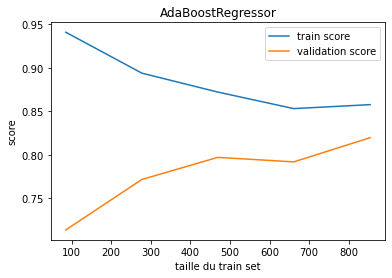

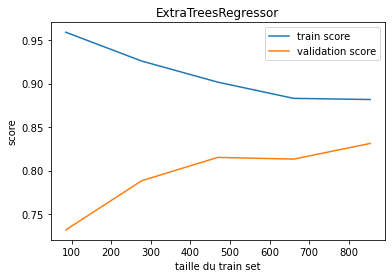

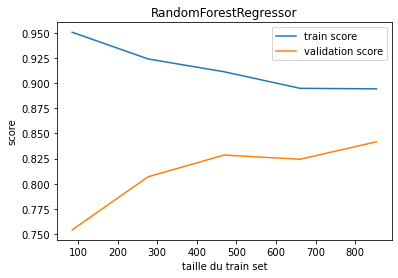

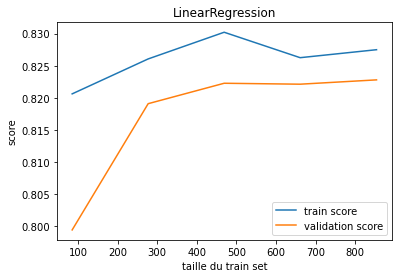

In [17]:
 for nameofmodel in dict_of_models:
        model,param_grid = dict_of_models[nameofmodel][0],dict_of_models[nameofmodel][1]
        print('Travaillons sur le model:', nameofmodel)  
    
        grid = GridSearchCV(model,param_grid,cv=5)
        grid.fit(x_train, y_train)
        
        print('les meilleurs hyperparamètres pour ce modèle sont : ', grid.best_params_)
        meilleurmodel=grid.best_estimator_
        print('le score de ce model sur le test set est:',meilleurmodel.score(x_test,y_test))
        
        N, train_score, val_score =learning_curve(meilleurmodel, x_train,y_train,cv=5)
        plt.subplots()
        plt.plot(N,train_score.mean(axis=1),label="train score")
        plt.plot(N,val_score.mean(axis=1),label="validation score")
        plt.title(nameofmodel)
        plt.xlabel('taille du train set')
        plt.ylabel('score')
        plt.legend()


Le modèle de LinearRegresion obtient le meilleur score, de plus on voit sur les learnings curves que les train et validation scores sont les plutôt proche ce qui exclu des problèmes d'overfitting. De plus le caractères croissant des courbes sous-entend que les scores s'amélioreraient si on avait plus de données.